# SDO/HMI

In [ ]:
ds_path = "./data/sdo/hmi"
email = "mgjeon@khu.ac.kr"

start_date = "2024-01-01"
end_date = "2024-01-02"

In [ ]:
from datetime import datetime, timedelta

t_start = datetime.strptime(start_date, "%Y-%m-%d")
t_end = datetime.strptime(end_date, "%Y-%m-%d")
td = timedelta(hours=12)
date_list = [t_start + i * td for i in range((t_end - t_start) // td)]
date_list

[datetime.datetime(2024, 1, 1, 0, 0), datetime.datetime(2024, 1, 1, 12, 0)]

In [ ]:
from itipy.download.download_sdo_hmi import SDOHMIDownloader

downloader = SDOHMIDownloader(ds_path=ds_path, email=email)

In [ ]:
import warnings; warnings.filterwarnings("ignore")

for d in date_list:
    downloader.downloadDate(d)

2025-02-14 07:28:59,653 - SDOHMIDownloader - INFO - Start download: 2024-01-01T00:00:00
Ic_720s: 100%|██████████| 14.5M/14.5M [00:06<00:00, 2.38MB/s]
M_720s: 100%|██████████| 13.9M/13.9M [00:09<00:00, 1.51MB/s]
2025-02-14 07:29:12,620 - SDOHMIDownloader - INFO - Finished: 2024-01-01T00:00:00
2025-02-14 07:29:12,621 - SDOHMIDownloader - INFO - Start download: 2024-01-01T12:00:00
M_720s: 100%|██████████| 13.9M/13.9M [00:05<00:00, 2.86MB/s]]
Ic_720s: 100%|██████████| 14.6M/14.6M [00:05<00:00, 2.97MB/s]
2025-02-14 07:29:19,683 - SDOHMIDownloader - INFO - Finished: 2024-01-01T12:00:00


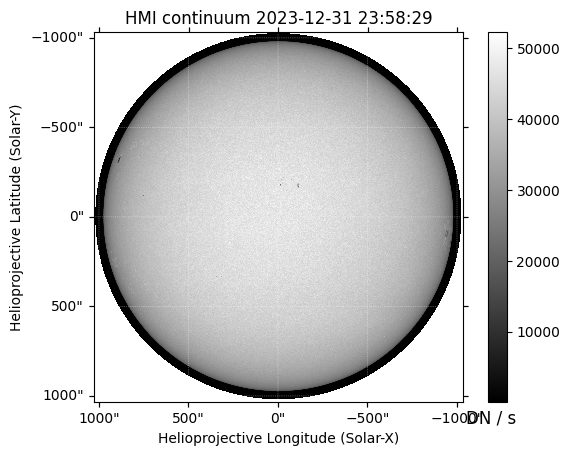

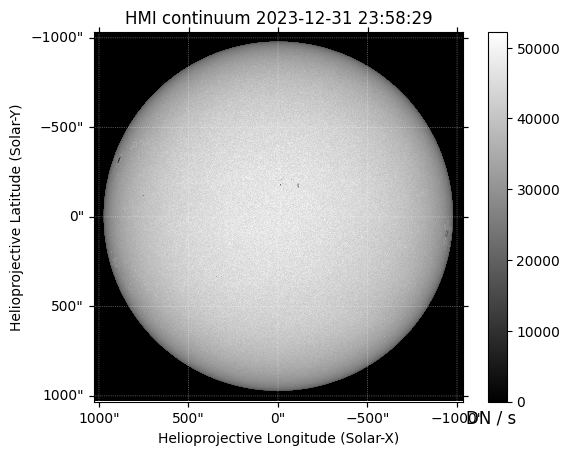

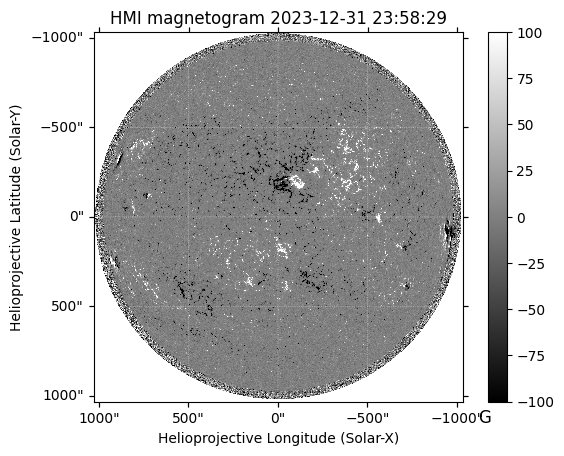

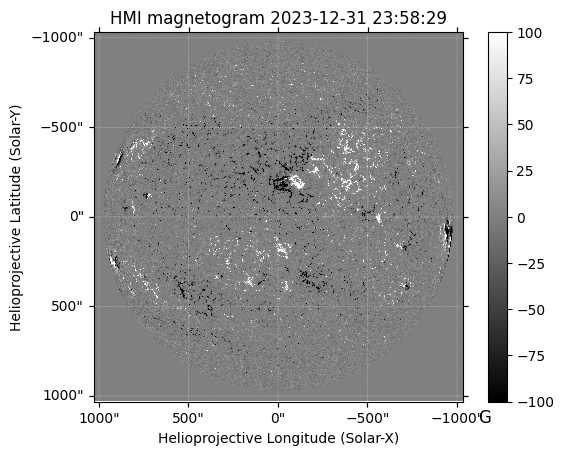

In [ ]:
from pathlib import Path
from sunpy.map import Map
from sunpy.map.maputils import all_coordinates_from_map, coordinate_is_on_solar_disk
from astropy.visualization import ImageNormalize
import numpy as np

series = ['Ic_720s', 'M_720s']
dl = Path(ds_path)

for s in series:
    file = sorted((dl / s).glob('*.fits'))[0]
    smap = Map(file)
    if s == 'M_720s':
        smap.plot_settings['norm'] = ImageNormalize(vmin=-100, vmax=100)
    smap.peek()

    hpc_coords = all_coordinates_from_map(smap)
    mask = ~coordinate_is_on_solar_disk(hpc_coords)
    smap.data[mask] = 0.0
    smap = Map(np.nan_to_num(smap.data, nan=0.0), smap.meta)
    if s == 'M_720s':
        smap.plot_settings['norm'] = ImageNormalize(vmin=-100, vmax=100)
    smap.peek()